In [68]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from keras.models import Sequential
from keras import layers
from keras import backend
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
import numpy as np
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.preprocessing.text import Tokenizer

plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()



In [3]:

data=pd.read_csv("train.csv")
data=data[['question_text','target']]
data.head()

,question_text,target
0,How did Quebec nationalists see their province...,0
1,"Do you have an adopted dog, how would you enco...",0
2,Why does velocity affect time? Does velocity a...,0
3,How did Otto von Guericke used the Magdeburg h...,0
4,Can I convert montra helicon D to a mountain b...,0


In [4]:
sentences = data['question_text'].values
y = data['target'].values

vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(sentences)

sentences_train, sentences_test, y_train, y_test = train_test_split(
sentences, y, test_size=0.01, random_state=1000)

sentences_train, dummy_x, y_train, dummy_y = train_test_split(
sentences_train, y_train, test_size=0.99, random_state=1000)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)


input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


W1119 22:10:05.636610 140372708783936 deprecation_wrapper.py:119] From /usr/lib/python3/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1119 22:10:05.652106 140372708783936 deprecation_wrapper.py:119] From /usr/lib/python3/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1119 22:10:05.654879 140372708783936 deprecation_wrapper.py:119] From /usr/lib/python3/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [13]:
model.compile(loss='binary_crossentropy',  optimizer='adam',  metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                2378680   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 2,378,691
Trainable params: 2,378,691
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(X_train, y_train,epochs=5,verbose=True,validation_data=(X_test, y_test), batch_size=100)

Train on 12930 samples, validate on 13062 samples
Epoch 1/5
12930/12930 [==============================] - 37s 3ms/step - loss: 0.4078 - acc: 0.9398 - val_loss: 0.2807 - val_acc: 0.9391
Epoch 2/5
12930/12930 [==============================] - 38s 3ms/step - loss: 0.2310 - acc: 0.9407 - val_loss: 0.2257 - val_acc: 0.9391
Epoch 3/5
12930/12930 [==============================] - 39s 3ms/step - loss: 0.1704 - acc: 0.9450 - val_loss: 0.1842 - val_acc: 0.9427
Epoch 4/5
12930/12930 [==============================] - 39s 3ms/step - loss: 0.1226 - acc: 0.9585 - val_loss: 0.1689 - val_acc: 0.9444
Epoch 5/5
12930/12930 [==============================] - 38s 3ms/step - loss: 0.0929 - acc: 0.9687 - val_loss: 0.1650 - val_acc: 0.9460


In [15]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9766
Testing Accuracy:  0.9460


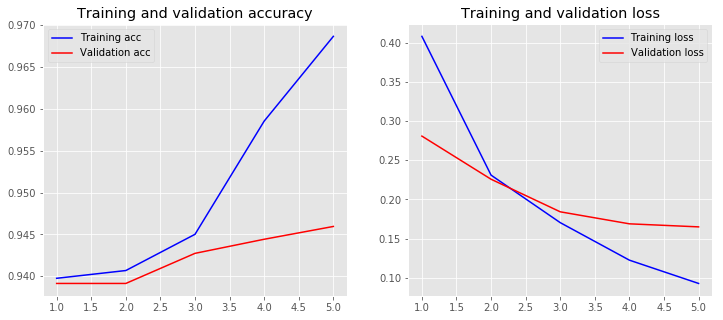

In [18]:
plot_history(history)

In [28]:

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(sentences_train[2])

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)


Why do people believe man is the major cause of climate change without any empirical evidence to support it?


In [29]:
max_features = 20000
# cut texts after this number of words
# (among top max_features most common words)
maxlen = 100
batch_size = 1000

model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

In [34]:

print('Train...')
history=model.fit(X_train, y_train,batch_size=batch_size,epochs=3,validation_data=[X_test, y_test])

Train...
Train on 12930 samples, validate on 13062 samples
Epoch 1/3
12930/12930 [==============================] - 15s 1ms/step - loss: 0.2016 - acc: 0.9407 - val_loss: 0.1959 - val_acc: 0.9391
Epoch 2/3
12930/12930 [==============================] - 15s 1ms/step - loss: 0.1741 - acc: 0.9408 - val_loss: 0.1725 - val_acc: 0.9391
Epoch 3/3
12930/12930 [==============================] - 17s 1ms/step - loss: 0.1368 - acc: 0.9459 - val_loss: 0.1561 - val_acc: 0.9455


In [35]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


Training Accuracy: 0.9555
Testing Accuracy:  0.9455


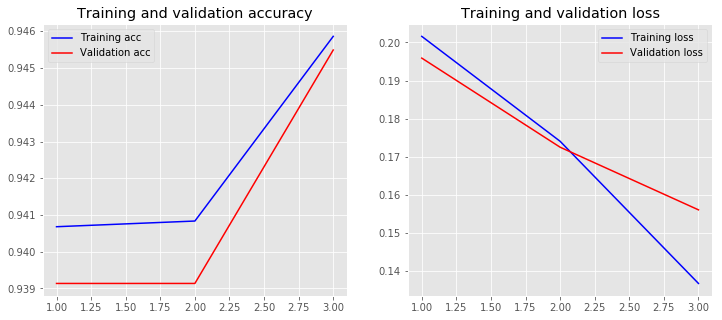

In [36]:
plot_history(history)

In [73]:

data=pd.read_csv("train.csv")
data=data[['question_text','target']]

sentences = data['question_text'].values
y = data['target'].values


sentences_train, sentences_test, y_train, y_test = train_test_split(
sentences, y, test_size=0.01, random_state=1000) #fix test data
loop_data=sentences_train
loop_y=y_train



In [74]:




max_features = 20000
# cut texts after this number of words
# (among top max_features most common words)
maxlen = 100
batch_size = 1000





In [77]:
increment=1287460
for i in range(30):
    

    sentences_train, dummy_x, y_train, dummy_y = train_test_split(
    loop_data, loop_y, test_size=increment, random_state=1000)

    tokenizer = Tokenizer(num_words=5000)
    tokenizer.fit_on_texts(sentences_train)

    X_train = tokenizer.texts_to_sequences(sentences_train)
    X_test = tokenizer.texts_to_sequences(sentences_test)

    vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

    

    X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
    X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
    model = Sequential()
    model.add(Embedding(max_features, 128, input_length=maxlen))
    model.add(Bidirectional(LSTM(64)))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
    
    history=model.fit(X_train, y_train,batch_size=batch_size,epochs=3,validation_data=[X_test, y_test])
    increment=increment-5600
    backend.clear_session()
    
    

Train on 5600 samples, validate on 13062 samples
Epoch 1/3
5600/5600 [==============================] - 10s 2ms/step - loss: 0.6305 - acc: 0.8775 - val_loss: 0.5204 - val_acc: 0.9391
Epoch 2/3
5600/5600 [==============================] - 8s 2ms/step - loss: 0.4195 - acc: 0.9418 - val_loss: 0.2521 - val_acc: 0.9391
Epoch 3/3
5600/5600 [==============================] - 8s 1ms/step - loss: 0.2350 - acc: 0.9418 - val_loss: 0.2582 - val_acc: 0.9391
Train on 11200 samples, validate on 13062 samples
Epoch 1/3
11200/11200 [==============================] - 15s 1ms/step - loss: 0.5534 - acc: 0.9136 - val_loss: 0.2683 - val_acc: 0.9391
Epoch 2/3
11200/11200 [==============================] - 15s 1ms/step - loss: 0.2440 - acc: 0.9407 - val_loss: 0.2326 - val_acc: 0.9391
Epoch 3/3
11200/11200 [==============================] - 15s 1ms/step - loss: 0.2230 - acc: 0.9407 - val_loss: 0.2200 - val_acc: 0.9391
Train on 16800 samples, validate on 13062 samples
Epoch 1/3
16800/16800 [====================

100800/100800 [==============================] - 101s 1ms/step - loss: 0.1162 - acc: 0.9534 - val_loss: 0.1364 - val_acc: 0.9487
Train on 106400 samples, validate on 13062 samples
Epoch 1/3
106400/106400 [==============================] - 107s 1ms/step - loss: 0.2362 - acc: 0.9317 - val_loss: 0.1442 - val_acc: 0.9482
Epoch 2/3
106400/106400 [==============================] - 106s 1ms/step - loss: 0.1299 - acc: 0.9492 - val_loss: 0.1356 - val_acc: 0.9495
Epoch 3/3
106400/106400 [==============================] - 106s 998us/step - loss: 0.1169 - acc: 0.9538 - val_loss: 0.1369 - val_acc: 0.9492
Train on 112000 samples, validate on 13062 samples
Epoch 1/3
112000/112000 [==============================] - 113s 1ms/step - loss: 0.2290 - acc: 0.9391 - val_loss: 0.1381 - val_acc: 0.9487
Epoch 2/3
112000/112000 [==============================] - 112s 999us/step - loss: 0.1293 - acc: 0.9502 - val_loss: 0.1343 - val_acc: 0.9508
Epoch 3/3
112000/112000 [==============================] - 112s 999us/

In [70]:
backend.clear_session()